In [ ]:
!pip install d2l==0.14.2

4.1 Multilayer Perceptrons

4.1.1 Hidden Layers

4.1.2 Activation Functions

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

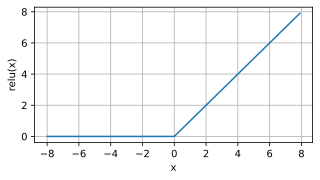

In [3]:
x=torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y=torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

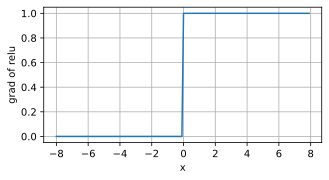

In [4]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

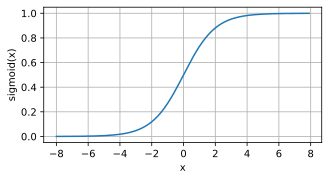

In [5]:
y=torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

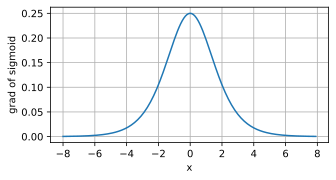

In [7]:
#Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

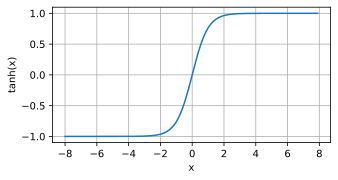

In [8]:
y=torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

4.2 Implementation of Multilayer Perceptrons from Scratch

In [13]:
import torch
from torch import nn

In [14]:
batch_size=256
train_iter, test_iter=d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


4.2.1 Initializing Model Parameters

In [16]:
num_inputs, num_outputs, num_hiddens=784, 10, 256

W1=nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2=nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params=[W1, b1, W2, b2]

4.2.2 Activation Functions

In [17]:
def relu(X):
  a=torch.zeros_like(X)
  return torch.max(X,a)

4.2.3 Model

In [18]:
def net(X):
  X=X.reshape((-1, num_inputs))
  H=relu(X@W1+b1)    # Here '@' stands for matrix multiplication
  return (H@W2 + b2)

4.2.4 Loss Function

In [19]:
loss = nn.CrossEntropyLoss(reduction='none')

4.2.5 Training

In [ ]:
num_epochs, lr=10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


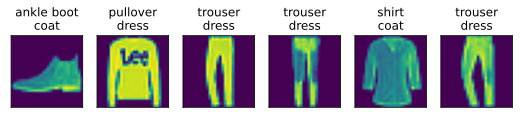

In [21]:
d2l.predict_ch3(net, test_iter)

4.3 Concise Implementation of Multilayer Perceptrons

4.3.1 Model

In [22]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m)==nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [23]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

4.4 Model Selection, Underfitting, and Overfitting

4.4.4 Polynomial Regresshion

In [25]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [26]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train+n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
  poly_features[:,i] /= math.gamma(i+1)

labels = np.dot(poly_features, true_w)
labels+=np.random.normal(scale=0.1, size=labels.shape)

In [27]:
# Convert from Numpy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
     torch. float32) for x in [true_w, features, poly_features, labels]]

In [28]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.2155],
         [ 0.0056]]),
 tensor([[ 1.0000e+00, -2.1553e-01,  2.3227e-02, -1.6687e-03,  8.9914e-05,
          -3.8758e-06,  1.3923e-07, -4.2868e-09,  1.1549e-10, -2.7658e-12,
           5.9611e-14, -1.1680e-15,  2.0978e-17, -3.4781e-19,  5.3545e-21,
          -7.6937e-23,  1.0364e-24, -1.3140e-26,  1.5733e-28, -1.7848e-30],
         [ 1.0000e+00,  5.6170e-03,  1.5775e-05,  2.9536e-08,  4.1475e-11,
           4.6593e-14,  4.3619e-17,  3.5001e-20,  2.4575e-23,  1.5337e-26,
           8.6148e-30,  4.3990e-33,  2.0591e-36,  8.8967e-40,  3.5733e-43,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]),
 tensor([4.7644, 4.9407]))

In [ ]:
def evaluate_loss(net, data_iter, loss):
  """Evaluate the loss of a model on the given dataset."""
  metric=d2l.Accumulator(2)
  for X, y in data_iter:
    out = net(X)
    y=y.reshape(out.shape)
    l=loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

In [36]:
def train(train_features, test_features, train_labels, test_labels, 
          num_epochs=400):
  loss = nn.MSELoss(reduction='none')
  input_shape = train.features.shape[-1]
  # Switch off the bias since we already catered for it in the polynomial features
  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, train_labels.shape[0])
  train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                              batch_size, is_train=False)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                             batch_size, is_train=False)
  trainer = torch.optim.SGD(net.parameters(), lr=0.01)
  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                          xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                          legend=['train', 'test'])
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch +1) % 20 == 0:
      animator.add(epoch +1, (evaluate_loss(net, train_iter, loss),
                             evaluate_loss(net, test_iter, loss)))
  print('weight:', net[0].weight.data.numpy())

In [ ]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynimal features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

In [ ]:
# Pick the first two dimensions, i.2, 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

In [ ]:
#Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

4.5 Weight Decay

4.5.2 High-Dimensional Linear Regression

In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [39]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1))*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

In [40]:
def init_params():
  w=torch.normal(0,1, size=(num_inputs, 1), requires_grad = True)
  b= torch.zeros(1, requires_grad = True)
  return [w, b]

In [41]:
def l2_penalty(w):
  return torch.sum(w.pow(2))/2

In [42]:
def train(lambd):
  w, b= init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr=100, 0.003
  animator = d2l.Animator(xlabel='epochs', ylabel = 'loss', yscale='log',
                          xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      #The L2 norm penalty term has been added, and broadcasting
      # makes 'l2_penalty(w)' a vector whose length is 'batch_size'
      l = loss(net(X), y) + lambd*l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w,b], lr, batch_size)
    if (epoch+1)%5 == 0:
      animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                             d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 13.807680130004883


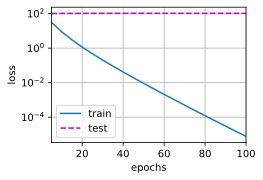

In [43]:
train(lambd=0)

In [44]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()
  loss = nn.MSELoss(reduction='none')
  num_epochs, lr = 100, 0.003
  # The bias parameter has not decayed
  trainer = torch.optim.SGD([
                             {"params":net[0].weight, 'weight_decay':wd},
                             {"params":net[0].bias}], lr=lr)
  animator = d2l.Animator(xlabel='epochs', ylabel = 'loss', yscale='log',
                          xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      l=loss(net(X), y)
      l.mean().backward()
      trainer.step()
    if (epoch+1)%5 ==0:
      animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                             d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', net[0].weight.norm().item())


L2 norm of w: 14662.94140625


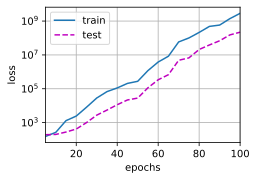

In [45]:
train_concise(0)